<a href="https://colab.research.google.com/github/AribelGuzman/Estadistica_Python/blob/main/Hipotesis_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

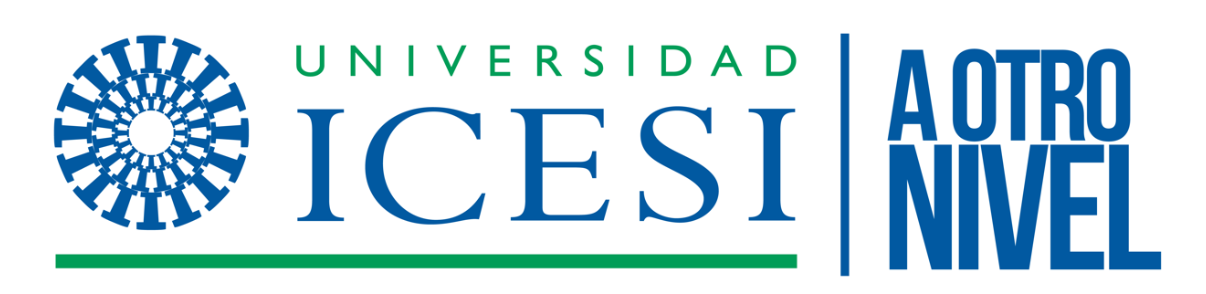

## **Presentado Por:** Diana Guzm√°n, Sebastian Barrera, Gustavo Restrepo

In [ ]:
## Libreria de funciones estad√≠sticas
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones num√©ricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## funci√≥n para formatear en visualizaciones
from scipy.stats import norm ## distribuci√≥n normal
from scipy.stats import poisson ## distribuci√≥n Poisson
from scipy.stats import t ## distribuci√≥n t
from scipy.stats import f ## distribuci√≥n F
from scipy.stats import ttest_1samp  ## Prueba t una poblaci√≥n
from scipy.stats import ttest_ind ## Prueba t comparaci√≥n medias
from scipy.stats import shapiro ## Prueba normalidad Shapiro-Wilks
from scipy.stats import anderson ## Prueba normalidad Anderson-Darling
from scipy.stats import levene ## Prueba homogeneidad de varianzas Levene
from scipy.stats import mannwhitneyu ## Prueba Mann-Whitney-Wilcoxon (comparaci√≥n dos poblaciones)
from scipy.stats import f_oneway ## Prueba ANOVA de una v√≠a
from scipy.stats import chi2_contingency ## Prueba chi cuadrado de Pearson
from scipy.stats import pearsonr ## Coeficiente de correlaci√≥n de Pearson con prueba
import statsmodels.stats as sm  ## estad√≠sticas
import statsmodels.api as sm1  ## estad√≠sticas
from statsmodels.graphics.gofplots import qqplot ## Gr√°fico QQ plot
import pingouin as pg ## LIbrer√≠a funciones estad√≠sticas
from scipy.stats import skew, kurtosis  ## funciones estad√≠sticas


# **Descripci√≥n Ejercicio Pr√°ctico**

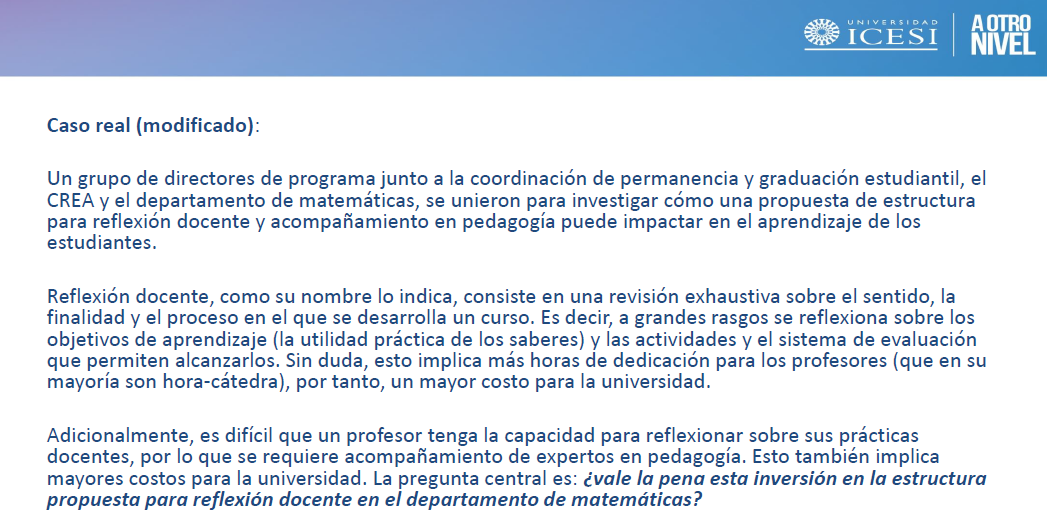

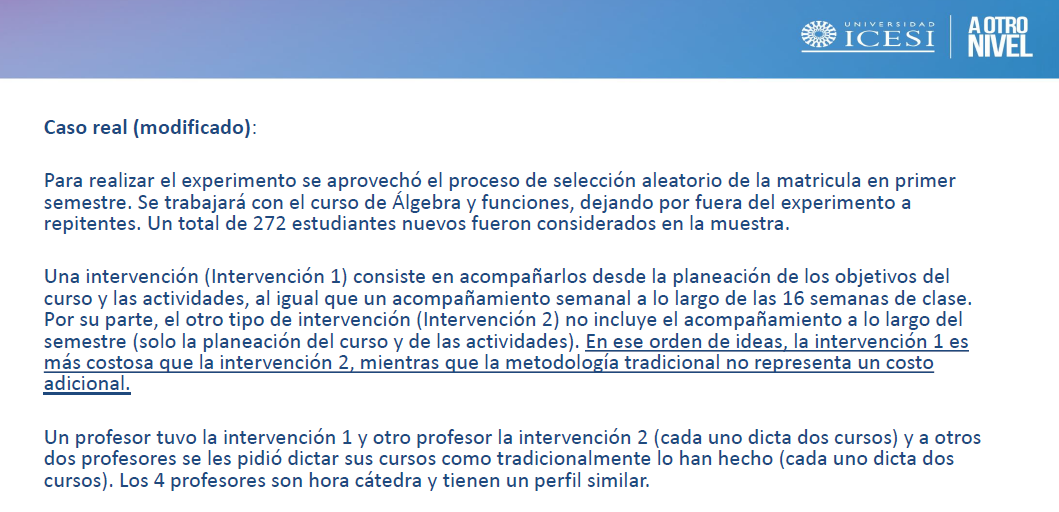

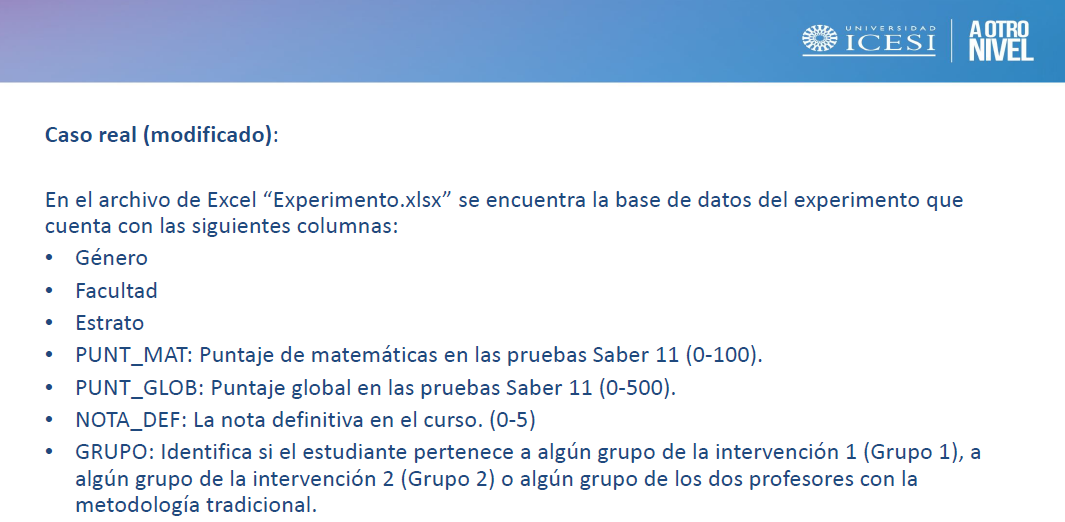

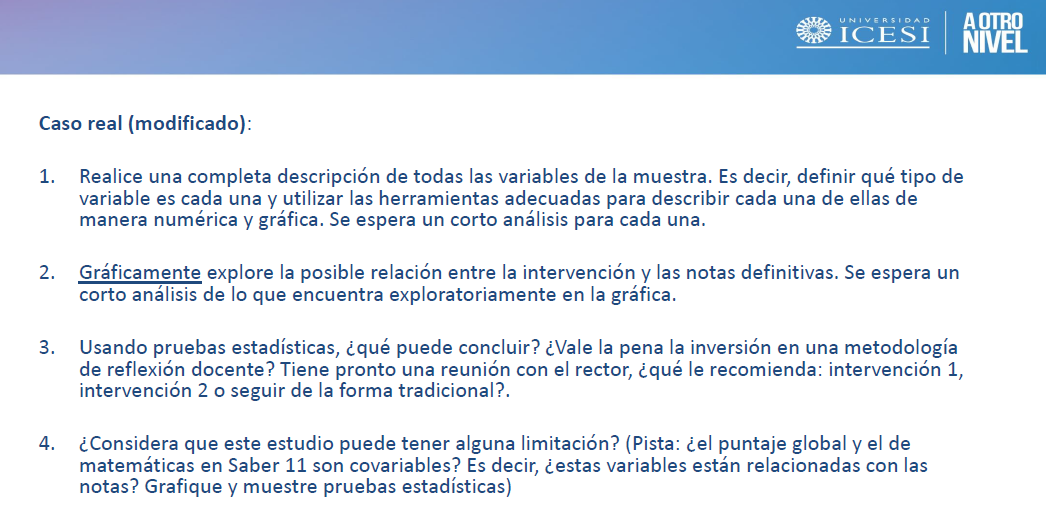

# **Punto 1**

Realice una completa descripci√≥n de todas las variables de la muestra. Es decir, definir qu√© tipo de variable es cada una y utilizar las herramientas adecuadas para describir cada una de ellas de manera num√©rica y gr√°fica. Se espera un corto an√°lisis para cada una.

In [ ]:
## Cargo los datos
url = "https://raw.githubusercontent.com/GARF1094/EDA/main/Experimento.xlsx"
data = pd.read_excel(url)
data

Unnamed: 0 G√©nero Facultad  Estrato  PUNT_MAT  PUNT_GLOB  NOTA_DEF  \
0             1      M      FCN        2        63        324      2.35   
1             2      M     FING        1        67        353      3.09   
2             3      M      FCN        2        52        306      2.68   
3             4      M     FING        4        58        277      2.77   
4             5      F     FCAE        3        72        372      3.79   
..          ...    ...      ...      ...       ...        ...       ...   
267         268      M     FING        1        66        337      3.41   
268         269      F      FCN        2        79        381      3.89   
269         270      F      FCN        6        80        362      3.89   
270         271      M     FING        3        79        389      2.74   
271         272      M     FCAE        4        66        312      3.19   

           GRUPO  
0    Tradicional  
1    Tradicional  
2    Tradicional  
3    Tradicional  
4    Tradicional  
..           ...  
267       Grupo2  
268       Grupo2  
269       Grupo2  
270       Grupo2  
271       Grupo2  

[272 rows x 8 columns]

In [ ]:
#Limpiamos una columna innecesaria
data= data.drop(['Unnamed: 0'], axis=1) 
data

G√©nero Facultad  Estrato  PUNT_MAT  PUNT_GLOB  NOTA_DEF        GRUPO
0        M      FCN        2        63        324      2.35  Tradicional
1        M     FING        1        67        353      3.09  Tradicional
2        M      FCN        2        52        306      2.68  Tradicional
3        M     FING        4        58        277      2.77  Tradicional
4        F     FCAE        3        72        372      3.79  Tradicional
..     ...      ...      ...       ...        ...       ...          ...
267      M     FING        1        66        337      3.41       Grupo2
268      F      FCN        2        79        381      3.89       Grupo2
269      F      FCN        6        80        362      3.89       Grupo2
270      M     FING        3        79        389      2.74       Grupo2
271      M     FCAE        4        66        312      3.19       Grupo2

[272 rows x 7 columns]

In [ ]:
#Renombramos las columnas para evitar que fallen por t√≠ldes
columnas = ["Genero","Facultad","Estrato","PUNT_MAT","PUNT_GLOB","NOTA_DEF","GRUPO"] 
data.columns = columnas
data

Genero Facultad  Estrato  PUNT_MAT  PUNT_GLOB  NOTA_DEF        GRUPO
0        M      FCN        2        63        324      2.35  Tradicional
1        M     FING        1        67        353      3.09  Tradicional
2        M      FCN        2        52        306      2.68  Tradicional
3        M     FING        4        58        277      2.77  Tradicional
4        F     FCAE        3        72        372      3.79  Tradicional
..     ...      ...      ...       ...        ...       ...          ...
267      M     FING        1        66        337      3.41       Grupo2
268      F      FCN        2        79        381      3.89       Grupo2
269      F      FCN        6        80        362      3.89       Grupo2
270      M     FING        3        79        389      2.74       Grupo2
271      M     FCAE        4        66        312      3.19       Grupo2

[272 rows x 7 columns]

**Describimos las variables:**
>**G√©nero:**	Cualitativa Nominal

>**Facultad:**	Cualitativa Nominal

>**Estrato:**	Cualitativa Ordinal

>**PUNT_MAT:**	Cuantitativa Discreta

>**PUNT_GLOB:**	Cuantitativa Discreta

>**NOTA_DEF:**	Cuantitativa Continua

>**GRUPO:**	Cualitativa Nominal

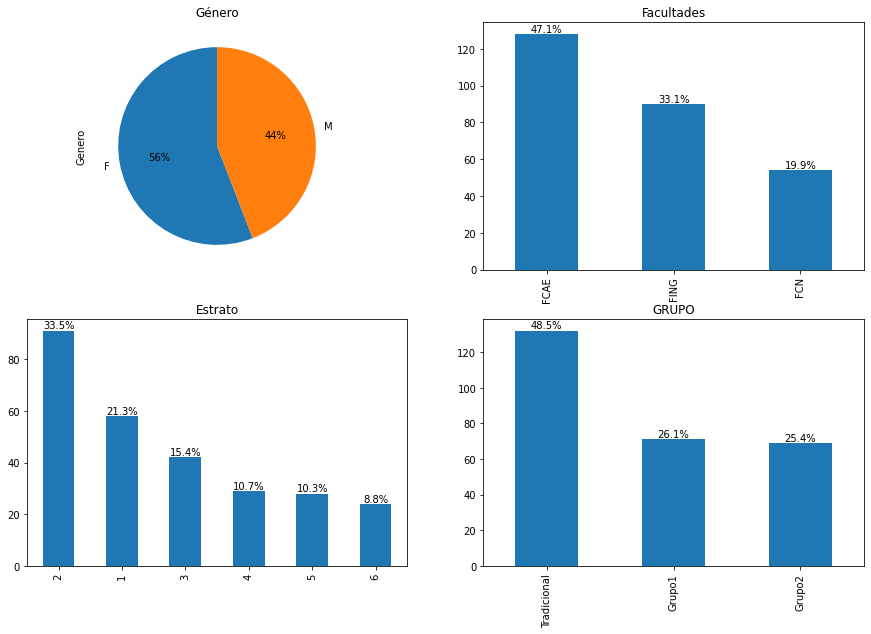

In [ ]:
fig, axs = plt.subplots(figsize=[15, 10], ncols=2, nrows=2)

### GR√ÅFICO PASTEL SEXOS

ax1 = data["Genero"].value_counts().plot(kind="pie",startangle=90, autopct='%1.0f%%', title="G√©nero", ax = axs[0,0],)

### GR√ÅFICO BARRA FACULTAD

counts = data["Facultad"].value_counts()
percentages = counts / counts.sum() * 100

ax2 = counts.plot(kind="bar", title="Facultades", ax = axs[0,1])
ax2.bar_label(ax2.containers[0], labels=[f"{p:.1f}%" for p in percentages])

### GR√ÅFICO BARRA ESTRATO

counts2 = data["Estrato"].value_counts()
percentages2 = counts2 / counts2.sum() * 100

ax3 = counts2.plot(kind="bar", title="Estrato", ax = axs[1,0])
ax3.bar_label(ax3.containers[0], labels=[f"{p:.1f}%" for p in percentages2])

### GR√ÅFICO BARRA GRUPO

counts3 = data["GRUPO"].value_counts()
percentages3 = counts3 / counts3.sum() * 100

ax4 = counts3.plot(kind="bar", title="GRUPO", ax = axs[1,1])
ax4.bar_label(ax4.containers[0], labels=[f"{p:.1f}%" for p in percentages3])

plt.show()

**An√°lisis**:

De las variables estudiadas, es posible visualizar que:
1. La distribucipon de g√©nero de la muestra es de 56% femenino y 44% masculino. Si bien, hay m√°s datos femeninos, no se encuentra tan desbalanceada.

2. La distribucipon de Facultades de la muestra es de 47% en Ciencias Econ√≥micas, 33% en la facultad de Ingenier√≠a y el 19.9% restante en Ciencias Naturales. Es decir, casi la mitad de la muestra se encuentra en la facultad de Ciencias Econ√≥micas.

3. La distribucipon de estratos de la muestra es del 33% en estrato 2, 21% en estrato 1, 15% en estrato 3, 11% ene strato 4, 10% en estrato 5 y 9% en estrato 6. Es decir, alrededor del 50% de los datos de la muestra se encuentran en estratos bajos (1 y 2).

4. La distribucipon de grupos de la muestra es del 48% en el grupo tradicional, 26% en el grupo 1 y 25% en el grupo 2. Es decir, casi la mitad de la muestra se encuentra en el grupo tradicional.

In [ ]:
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

In [ ]:
#Generamos tabla con las principales variables estad√≠sticas
fun_tabla_descriptivas(data[["PUNT_MAT","PUNT_GLOB","NOTA_DEF"]])

PUNT_MAT   PUNT_GLOB    NOTA_DEF
count            272.000000  272.000000  272.000000
mean              68.808824  339.264706    3.415846
std               10.006282   35.383140    0.511079
min               39.000000  219.000000    2.290000
25%               62.000000  316.750000    3.090000
50%               69.000000  341.000000    3.440000
75%               76.000000  362.000000    3.812500
max               95.000000  423.000000    4.780000
coef. variation    0.145421    0.104294    0.149620
skew              -0.232233   -0.339606   -0.130085
kurtosis           0.132099    0.489295   -0.551380

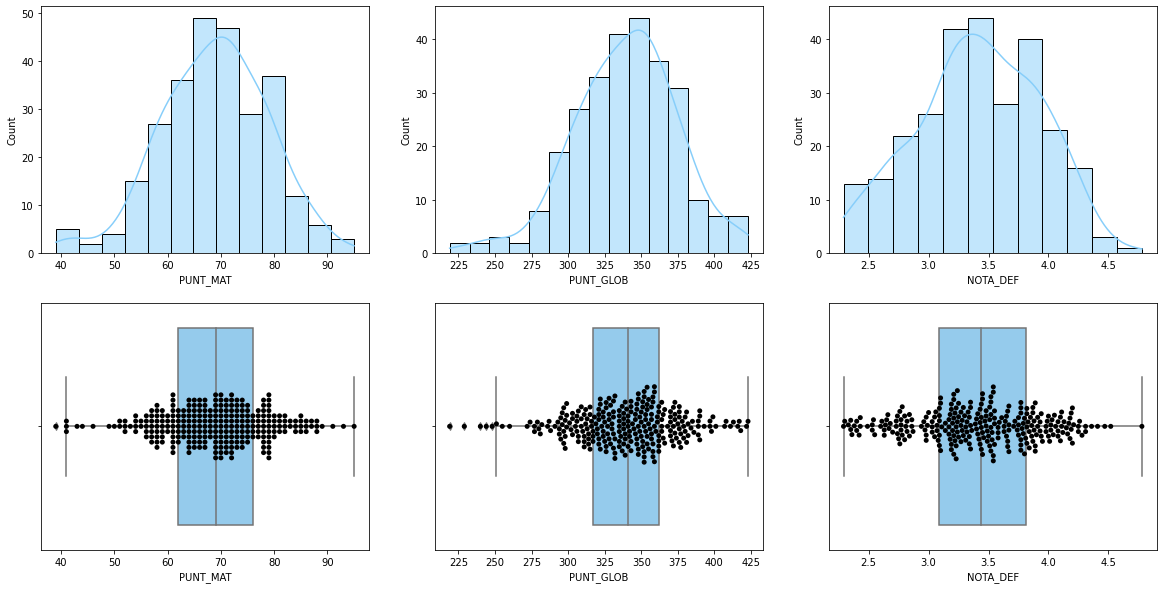

In [ ]:
fig, axs = plt.subplots(figsize=[20, 10], ncols=3, nrows = 2)

ax1 = sns.histplot(x=data["PUNT_MAT"],kde=True,color="lightskyblue", ax = axs[0,0])

ax2 = sns.histplot(x=data["PUNT_GLOB"],kde=True,color="lightskyblue", ax = axs[0,1])

ax3 = sns.histplot(x=data["NOTA_DEF"],kde=True,color="lightskyblue", ax = axs[0,2])

ax4 = sns.boxplot(x=data['PUNT_MAT'],color="lightskyblue", ax = axs[1,0])
ax4 = sns.swarmplot(x=data['PUNT_MAT'],color='black', ax = axs[1,0]) 

ax5 =sns.boxplot(x=data['PUNT_GLOB'],color="lightskyblue", ax = axs[1,1])
ax5 = sns.swarmplot(x=data['PUNT_GLOB'],color='black', ax = axs[1,1]) 

ax6 =sns.boxplot(x=data['NOTA_DEF'],color="lightskyblue", ax = axs[1,2])
ax6 = sns.swarmplot(x=data['NOTA_DEF'],color='black', ax = axs[1,2]) 

plt.show()

**An√°lisis**:

Con respecto a las variables cuantitativas, podemos observar lo siguiente:

**PUNT_MAT**: es una distribuci√≥n mayormente centrada, mesocurtica y con leve sesgo negativo (cola levemente hacia la izquierda)

**PUNT_GLOB**: es una distribuci√≥n leptocurtica (un poco m√°s puntiaguda)  y con un leve sesgo negativo (cola hacia la izquierda)

**NOTA_DEF**: es una distribuci√≥n centrada, mesocurtica y con un leve sesgo negativo (cola levemente hacia la izquierda)


# **Punto 2**

Gr√°ficamente explore la posible relaci√≥n entre la intervenci√≥n y las notas definitivas. Se espera un corto an√°lisis de lo que encuentra exploratoriamente en la gr√°fica.

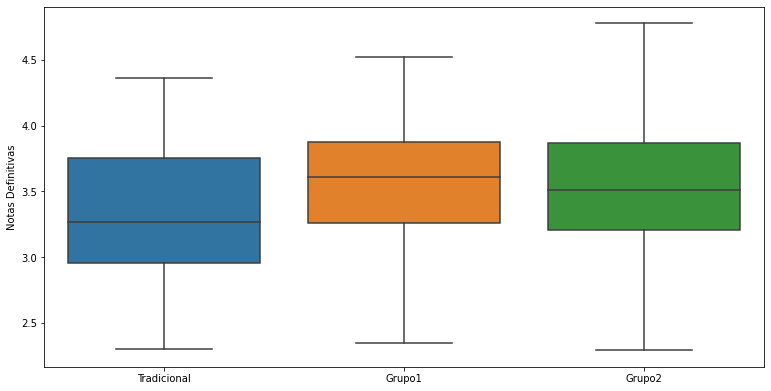

In [ ]:
fig_boxplot = plt.figure(figsize=(10,5)) 
ax = fig_boxplot.add_axes([0,0,1,1])
ax=sns.boxplot(x=data["GRUPO"], y=data["NOTA_DEF"])
plt.ylabel('Notas Definitivas')   
plt.xlabel('')           
plt.show()  

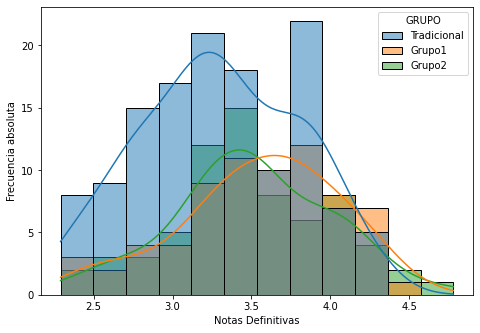

In [ ]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=data["NOTA_DEF"], hue=data["GRUPO"],kde=True)
plt.ylabel('Frecuencia absoluta')   
plt.xlabel('Notas Definitivas') 
plt.show() 

**An√°lisis**: 

De los gr√°ficos anteriores, es posible observar que la media del grupo tradicional es considerablemente menor que la media de los grupos 1 y 2. Entre los grupos 1 y 2, en cambio, aunque se observa una leve diferencia, no es realmente significativa. En otras palabras, se observa que los resultados del grupo tradicional son considerablemente menores que los obtenidos por los grupos intervenidos.

# **Punto 3**

Usando pruebas estad√≠sticas, ¬øqu√© puede concluir? ¬øVale la pena la inversi√≥n en una metodolog√≠a de reflexi√≥n docente? Tiene pronto una reuni√≥n con el rector, ¬øqu√© le recomienda: intervenci√≥n 1, intervenci√≥n 2 o seguir de la forma tradicional?.

In [ ]:
# Normalidad
#Ho: los datos se distribuyen normal
#Ha: los datos no se distribuyen normal

print("Poblaci√≥n: Tradicional")
Estad,vp = shapiro(data[data["GRUPO"]=="Tradicional"]["NOTA_DEF"])
print(f'Estad√≠stico SW= {Estad}, Valor-p= {vp}')
print("Poblaci√≥n: Grupo1")
Estad,vp = shapiro(data[data["GRUPO"]=="Grupo1"]["NOTA_DEF"])
print(f'Estad√≠stico SW= {Estad}, Valor-p= {vp}')
print("Poblaci√≥n: Grupo2")
Estad,vp = shapiro(data[data["GRUPO"]=="Grupo2"]["NOTA_DEF"])
print(f'Estad√≠stico SW= {Estad}, Valor-p= {vp}')

Poblaci√≥n: Tradicional
Estad√≠stico SW= 0.9811262488365173, Valor-p= 0.06354282051324844
Poblaci√≥n: Grupo1
Estad√≠stico SW= 0.9728129506111145, Valor-p= 0.12597548961639404
Poblaci√≥n: Grupo2
Estad√≠stico SW= 0.9880001544952393, Valor-p= 0.7529125809669495


**An√°lisis**:

Dado que el valor-p NO es mayor que el alfa, no es posible rechazar la H0. Por tanto, es posible asumir normalidad.

In [ ]:
# Homogeneidad de varianzas:
#Ho: los datos tienen varianzas homogeneas
#Ha: los datos no tienen varianzas homogeneas

Estad,vp=levene(data[data["GRUPO"]=="Tradicional"]["NOTA_DEF"],
               data[data["GRUPO"]=="Grupo1"]["NOTA_DEF"],
               data[data["GRUPO"]=="Grupo2"]["NOTA_DEF"],
               center='mean')
print(f'Estad√≠stico W= {Estad}, Valor-p= {vp}')

Estad√≠stico W= 0.20888940467847075, Valor-p= 0.8116164835091431


**An√°lisis**:

Dado que el valor-p NO es mayor que el alfa, no es posible rechazar la H0. Por tanto, es posible asumir homogeneidad en las varianzas.

**Prueba ANOVA**

Dado que se cumplen los supuestos de normalidad y homogeneidad de varianzas, se procede a hacer una prueba ANOVA. 

**Recordemos las hip√≥tesis**:

Ho: la media en todas las poblaciones es igual

Ha: la media de al menos una poblaci√≥n es diferente

In [ ]:
# Prueba ANOVA (libreria stats)
Estad,vp=f_oneway(data[data["GRUPO"]=="Tradicional"]["NOTA_DEF"],
               data[data["GRUPO"]=="Grupo1"]["NOTA_DEF"],
               data[data["GRUPO"]=="Grupo2"]["NOTA_DEF"])
print(f'Estad√≠stico F= {Estad}, Valor-p= {vp}')

Estad√≠stico F= 7.059853566705065, Valor-p= 0.0010273138866285362


In [ ]:
# Prueba ANOVA (con la libreria pingouin)
aov = pg.anova(dv='NOTA_DEF', between='GRUPO', data=data,detailed=True)
aov

Source         SS   DF        MS         F     p-unc       np2
0   GRUPO   3.530220    2  1.765110  7.059854  0.001027  0.049872
1  Within  67.255586  269  0.250021       NaN       NaN       NaN

**An√°lisis**: 

Dado que el valor-p NO es mayor que el alfa, no es posible rechazar la H0. Por tanto, con un 95% de confianza (incluso con un 99%) podemos afirmar que al menos una de las medias es diferente. 

Ahora bien, se procede a realizar una prueba HSD Tukey cuantificar las diferencias de medias entre grupos.

In [ ]:
# Prueba HSD Tukey
pg.pairwise_tukey(data=data, dv='NOTA_DEF', between='GRUPO')

A            B   mean(A)   mean(B)      diff        se         T  \
0  Grupo1       Grupo2  3.549859  3.499565  0.050294  0.084528  0.595000   
1  Grupo1  Tradicional  3.549859  3.300000  0.249859  0.073590  3.395278   
2  Grupo2  Tradicional  3.499565  3.300000  0.199565  0.074280  2.686645   

    p-tukey    hedges  
0  0.822919  0.099994  
1  0.002270  0.497910  
2  0.020872  0.397661

**An√°lisis**: 

La prueba HSD Tukey nos confirma diferencias en las medias del grupo 1 contra el tradicional y del grupo 2 contra el tradicional. Adem√°s, nos confirma que las medias entre los grupos 1 y 2 realmente no tienen una diferencia significativa. Lo anterior, se infiere de:

Grupo 1 vs Grupo 2: El valor P es mayor a un alfa de 5%, por tanto, con un nivel de confianza del 95%, no es posible rechazar la H0. Por tanto, no es posible afirmar que las medias de los grupos 1 y 2 son significativamente diferentes.

Grupo 1 vs Tradicional: El valor P es menor a un alfa de 5%, por tanto, con un nivel de confianza del 95%, es posible rechazar la H0. Por tanto, las medias del grupo 1 y el grupo tradicional son significativamente diferentes. 
    
Grupo 2 vs Tradicional: El valor P es menor a un alfa de 5%, por tanto, con un nivel de confianza del 95%, es posible rechazar la H0. Por tanto, las medias del grupo 2 y el grupo tradicional son significativamente diferentes. 
    
## **Recomendaci√≥n**:
Encontramos que definitivamente s√≠ hay diferencia en los resultados obtenidos entre los grupos con educaci√≥n tradicional y los intervenidos. Por tanto, vale la pena revisar la opci√≥n de una intervenci√≥n. Ahora bien, sin considerar la inversi√≥n econ√≥mica, la intervenci√≥n del grupo 1 es muy buena a nivel academico. No obstante, la intervenci√≥n del Grupo 2, sigue siendo muy buena academicamente y adem√°s cuenta con un menor costo para la universidad, por lo tanto, consideramos que √©sta seria la opci√≥n mas viable. 

# **Punto 4**

¬øConsidera que este estudio puede tener alguna limitaci√≥n? (Pista: ¬øel puntaje global y el de matem√°ticas en Saber 11 son covariables? Es decir, ¬øestas variables est√°n relacionadas con las notas? Grafique y muestre pruebas estad√≠sticas)

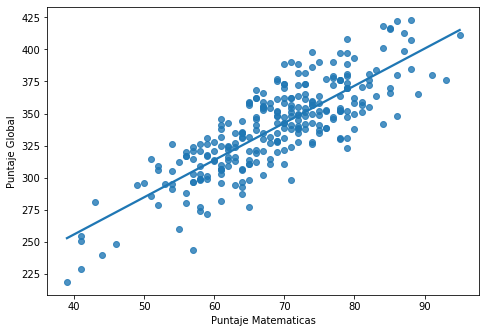

In [ ]:
# Diagrama de dispersi√≥n con l√≠nea de tendencia

fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.regplot(x=data["PUNT_MAT"],y=data["PUNT_GLOB"],ci=None)   
plt.ylabel('Puntaje Global')  
plt.xlabel('Puntaje Matematicas')         
plt.show()

In [ ]:
#Hip√≥tesis de la prueba de Pearson:

# Ho: No hay correlaci√≥n entre las variables (ùúå=0)
# Ha: Existe correlaci√≥n entre las variables (ùúå‚â†0)

Coef,vp=pearsonr(data["PUNT_MAT"],data["PUNT_GLOB"])
print(f'Coeficiente de correlaci√≥n= {Coef}, Valor-p= {vp}')

Coeficiente de correlaci√≥n= 0.819051135403779, Valor-p= 4.1770440202733855e-67


**An√°lisis**

Dado que el valor-p es mayor que un alfa del 5%, es posible rechazar la H0. Por tanto, con un 95% de confianza podemos afirmar que existe una correlaci√≥n lineal entre la variables. 

Ahora bien, esta prueba tambi√©n nos dice qu√© tan fuerte es esta correlaci√≥n lineal, para este caso, un coeficiente de 0.81 se podr√≠a interpretar como una correlaci√≥n fuerte. Por tanto, el puntaje global y el pubntaje de matem√°ticas de la prueba Saber 11 son variables relacionadas.